# Student Information

Name : 鄭兆瑋

Student ID : 108033214

GitHub ID : DITShark

---

# Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
# Begin Assignment Here


# 1 & 2. Data Preparation

In [2]:
# Categories
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']


In [3]:
# Obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


In [4]:
# Check the type of the data
type(twenty_train)


sklearn.utils._bunch.Bunch

In [5]:
# Check the attribute of the data
for attr in dir(twenty_train):
    print(attr)


DESCR
data
filenames
target
target_names


In [6]:
# Check the first two data from the attribute "data"
twenty_train.data[0:2]


['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [7]:
# Check what is in attribute "target_names"
twenty_train.target_names


['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
# Check the length of data
len(twenty_train.data)


2257

In [9]:
# Check the length of filenames
len(twenty_train.filenames)


2257

In [10]:
# Get the first row of data
twenty_train.data[0]


'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [11]:
# Print the data out more clearly by seperating \n
twenty_train.data[0].split("\n")


['From: sd345@city.ac.uk (Michael Collier)',
 'Subject: Converting images to HP LaserJet III?',
 'Nntp-Posting-Host: hampton',
 'Organization: The City University',
 'Lines: 14',
 '',
 'Does anyone know of a good way (standard PC application/PD utility) to',
 'convert tif/img/tga files into LaserJet III format.  We would also like to',
 'do the same, converting to HPGL (HP plotter) files.',
 '',
 'Please email any response.',
 '',
 'Is this the correct group?',
 '',
 'Thanks in advance.  Michael.',
 '-- ',
 'Michael Collier (Programmer)                 The Computer Unit,',
 'Email: M.P.Collier@uk.ac.city                The City University,',
 'Tel: 071 477-8000 x3769                      London,',
 'Fax: 071 477-8565                            EC1V 0HB.',
 '']

In [12]:
# Print the data out more clearly
print("\n".join(twenty_train.data[0].split("\n")))


From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [13]:
# Category of the first data
print(twenty_train.target_names[twenty_train.target[0]])


comp.graphics


In [14]:
# Category of the first data but check by attribute "target"
twenty_train.target[0]


1

In [15]:
# Category of first 10 documents
twenty_train.target[0:10]


array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [16]:
# Category of first 10 documents
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])


comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


## Exercise 1

In [17]:
# Print the first 3 data out
for d in twenty_train.data[:3]:
    print(d)


From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

# 3.1 Converting Dictionary into Pandas Dataframe

In [18]:
# Make twenty_train data into pandas Dataframe
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])


In [19]:
# Length of X
len(X)


2257

In [20]:
# The first two data of X
X[0:2]


,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [21]:
# Print the column "text" of first three data
for t in X["text"][:3]:
    print(t)


From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [22]:
# Add category to the dataframe
X['category'] = twenty_train.target


In [23]:
# Add category label also
X['category_name'] = X.category.apply(
    lambda t: dmh.format_labels(t, twenty_train))


In [24]:
# Print the table out
X[0:10]


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


# 3.2 Familiarizing yourself with the Data

In [25]:
# Simple query
X[:10][["text", "category_name"]]


,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [26]:
# The last ten data
X[-10:]


,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [27]:
# Use loc
X.loc[:10, "text"]


0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [28]:
# Use iloc
X.iloc[:10, 0]


0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

## Exercise 2

In [29]:
# Experiment with other querying techniques using pandas dataframes.
ex2 = pd.DataFrame(X, columns=list(
    ["text", "category_name"]), index=range(10, 20))
ex2


,text,category_name
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,alt.atheism
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",sci.med
17,Organization: Penn State University From: <JSN...,alt.atheism
18,From: tom_milligan@rainbow.mentorg.com Subject...,soc.religion.christian
19,Subject: Re: Don't more innocents die without ...,alt.atheism


## Exercise 3

In [30]:
# Try to fetch records belonging to the "sci.med" category
# And query every 10th record. Only show the first 5 records.
X[X["category_name"] == "sci.med"].iloc[0:50:10]


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


# 4.1.1 Missing Values

In [31]:
# Check missing values
X.isnull()


,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [32]:
# Use check_missing_values to get the number of missing value
X.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## Exercise 4

In [33]:
# Try to calculate missing value by each row
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

# 4.1.2 Missing Values

In [34]:
# Create a dummy series
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series


text        dummy_record
category               1
dtype: object

In [35]:
# Convert the dummy series into Dataframe & Change it to row base
dummy_series.to_frame().T


,text,category
0,dummy_record,1


In [36]:
# Combine X and dummy_series together
x_withdummy = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)


In [37]:
# Check if the records was commited into result
len(x_withdummy)


2258

In [38]:
# Check missing value again with x_withdummy
x_withdummy.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [39]:
# Create another dummy record by dictionary format
dummy_dict = [{'text': 'dummy_record_2',
               'category': 2
               }]


In [40]:
# Combine it together again
x_withdummy = pd.concat(
    [x_withdummy, pd.DataFrame(dummy_dict)], ignore_index=True)


In [41]:
# Check missing value again with x_withdummy
x_withdummy.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,2


In [42]:
# Remove the records with missing values
x_withdummy.dropna(inplace=True)


In [43]:
# Check missing value with x_withdummy to see the result of deleting missing value
x_withdummy.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## Exercise 5

In [44]:
import numpy as np

NA_dict = [{'id': 'A', 'missing_example': np.nan},
           {'id': 'B'},
           {'id': 'C', 'missing_example': 'NaN'},
           {'id': 'D', 'missing_example': 'None'},
           {'id': 'E', 'missing_example':  None},
           {'id': 'F', 'missing_example': ''}]

NA_df = pd.DataFrame(NA_dict, columns=['id', 'missing_example'])
NA_df


,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [45]:
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer:
The reason why Row 2 and 3 get False on checking missing value is because there is no missing values, it just contains two strings which is "NaN" and "None".  

And the Row 5 is the same, it contains a string but no word inside it.   

So I think these are the real problem we are going to deal with when doing data preprocessing which is there is no data but still contains a string inside.

# 4.2 Dealing with Duplicate Data

In [46]:
# Check duplicate data
X.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [47]:
# Check the number of duplicated data
sum(X.duplicated())


0

In [48]:
# Check the number of duplicated data only with "text" data
sum(X.duplicated("text"))


0

In [49]:
# Create two data which is duplicated and add it into X
dummy_duplicate_dict = [{
    'text': 'dummy record',
    'category': 1,
    'category_name': "dummy category"
},
    {
    'text': 'dummy record',
    'category': 1,
    'category_name': "dummy category"
}]

X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)


In [50]:
# Check whether the duplicate data we added is inside
len(X)


2259

In [51]:
# Check the number of duplicated data
sum(X.duplicated())


1

In [52]:
# Use drop_duplicates to delete duplicate data
# Keep -> keep one data
# Inplace -> applies changes directly on our dataframe
X.drop_duplicates(keep=False, inplace=True)


In [53]:
# Check the number of duplicated data
sum(X.duplicated())


0

In [54]:
# Check whether the duplicate data we added is deleted
len(X)


2257

# 5.1 Sampling

In [55]:
# Sampling provide by pandas
print(X.shape)
X_sample = X.sample(n=1000, random_state=42)
print(X_sample.shape)


(2257, 3)
(1000, 3)


In [56]:
display(X_sample)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


## Exercise 6

### Answer:  
The only difference I notice is that the sample data will not follow the order of the original data, and of course the distribution between sample one and original one will be a little bit different, but the datatype, the columns they have, the data that they have is all still the same as the original one. 

# 5.1.2 Matplotlib

In [57]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
# Check the categories we have
categories


['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [59]:
# Count the numbers of each category
print(X.category_name.value_counts())


category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

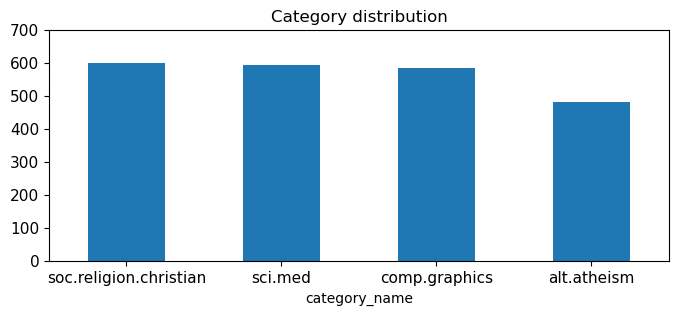

In [60]:
# Plot barchart for X
# ylim -> the height of y axis
# rot -> the angle of x axis labels
X.category_name.value_counts().plot(kind='bar',
                                    title='Category distribution',
                                    ylim=[0, 700],
                                    rot=0, fontsize=11, figsize=(8, 3))


In [61]:
# Count the numbers of each category of sample data
print(X_sample.category_name.value_counts())


category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

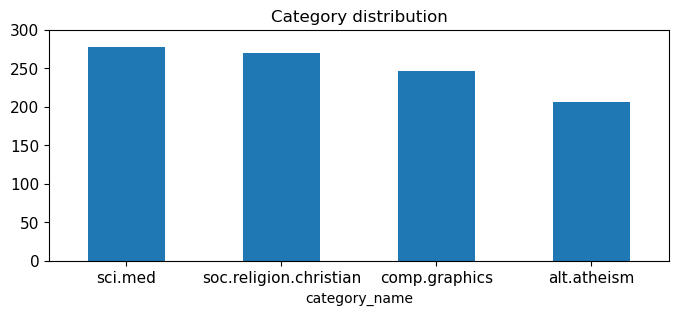

In [62]:
# Plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, 300],
                                           rot=0, fontsize=11, figsize=(8, 3))


## Exercise 7

category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

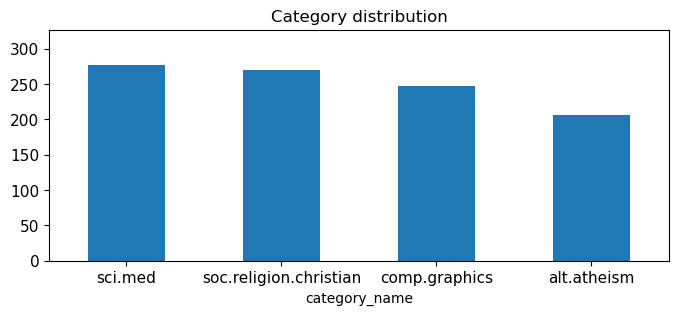

In [63]:
# Automated to change the height of y axis

upper_bound = max(X_sample.category_name.value_counts() + 50)
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, upper_bound],
                                           rot=0, fontsize=11, figsize=(8, 3))


In [64]:
X.category_name.value_counts().values


array([599, 594, 584, 480], dtype=int64)

## Exercise 8

In [65]:
# Make X and X_sample inside one graph
X_both = pd.merge(X.category_name.value_counts(),
                  X_sample.category_name.value_counts(), on='category_name')
X_both.columns = ["X", "X_sample"]


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

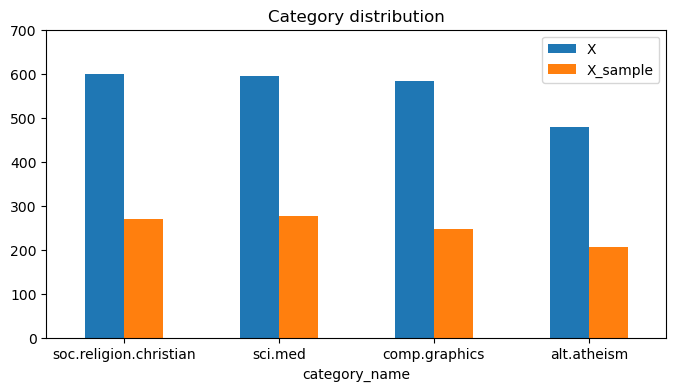

In [66]:
X_both.plot(kind='bar', title='Category distribution',
            ylim=[0, 700], figsize=(8, 4), rot=0)


# 5.2 Feature Creation

In [67]:
# import library nltk
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
# Count the vocabularies inside it and add it into the dataframe
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [69]:
# Look at the first four unigram data
X[0:4]["unigrams"]


0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [70]:
# Look at all the vocabularies inside the first document
list(X[0:1]["unigrams"])


[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

# 5.3.1 Feature subset selection

In [71]:
# Learn the vocabularies and return document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


In [72]:
# It will contain the shape of the number of documents and the number of the vocabularies
print(X_counts.shape)
print(X_counts[0])


(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [73]:
# Get all the words and also by index we can get the word
count_vect.get_feature_names_out()


array(['00', '000', '0000', ..., 'zzz', 'ªl', 'íålittin'], dtype=object)

In [74]:
count_vect.get_feature_names_out()[14887]


'from'

In [75]:
# build_analyzer can analyze the document to get rid of the stop word
# Stop words means no meaningful words Ex: I, He, She, a, It, the
# Make it tokenize, remove stop words (e.g i, a, the), create n-gram (or unigram)
analyze = count_vect.build_analyzer()
analyze(X.text[0])


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [76]:
# Example for build_analyzer
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")


['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

## Exercise 9

In [77]:
# Analyze the first record of our X dataframe
analyze(X.text[0])


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [78]:
# Another way of doing it by changing it into string
analyze(" ".join(list(X[:1].text)))


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

# 5.3.2 Feature subset selection 

In [79]:
# Check the shape of this matrix
X_counts.shape


(2257, 35788)

In [80]:
# Obtain the feature names by the vectorizer
count_vect.get_feature_names_out()[0:10]


array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [81]:
# Convert from sparse array to normal array
# With first five document and first hundred words
X_counts[0:5, 0:100].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

## Exercise 10

In [82]:
# Get the other word from the fifth record
for i in range(1, 100):
    if X_counts[4:5, 0:100].toarray()[0][i] == 1:
        print(count_vect.get_feature_names_out()[i])
        break


01


# 5.3.3 Feature subset selection 

In [83]:
# Get the first twenty documents and vocabularies
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x, end="\n\n")

plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
print(plot_y, end="\n\n")

plot_z = X_counts[0:20, 0:20].toarray()
print(plot_z)


['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


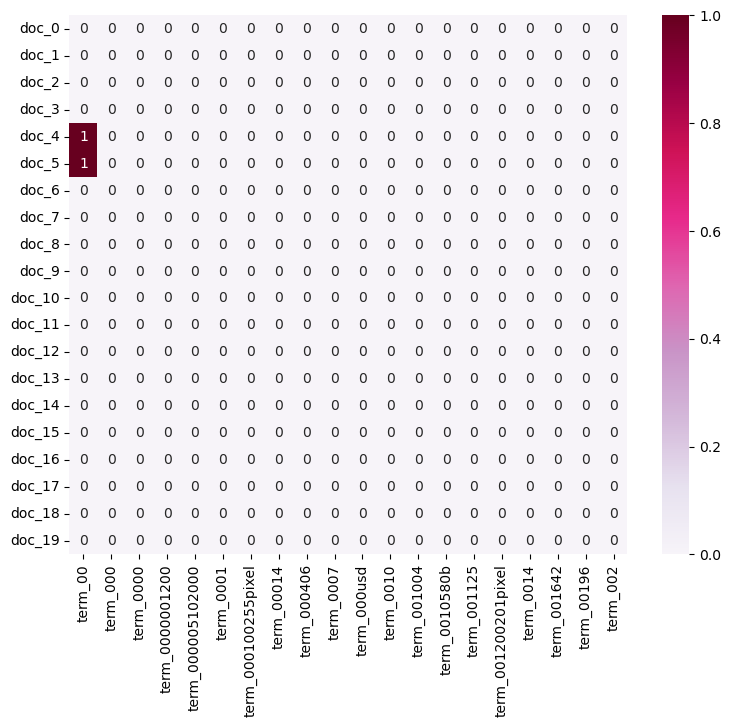

In [84]:
# import seaborn which is a more colorful than matplotlib
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


## Exercise 11

#### Answer  
Because the size of the graph is limited, we can't get all the result out, so we can get the important vocabulary out to make the heatmap nice and useful.  

For example we can choose 20 document out and also the vocabulary which shows up the most in these documents, and use these imformation to draw out the heatmap.  

We can know from the heatmap that is these document related or just no common with each document.

# 5.4 Dimensionality Reduction

In [85]:
#import PCA
from sklearn.decomposition import PCA


In [86]:
X_counts.shape


(2257, 35788)

In [87]:
# Use PCA to reduce the dimension, in this case it reduce it to 2
X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())


In [88]:
X_reduced.shape


(2257, 2)

In [89]:
categories


['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

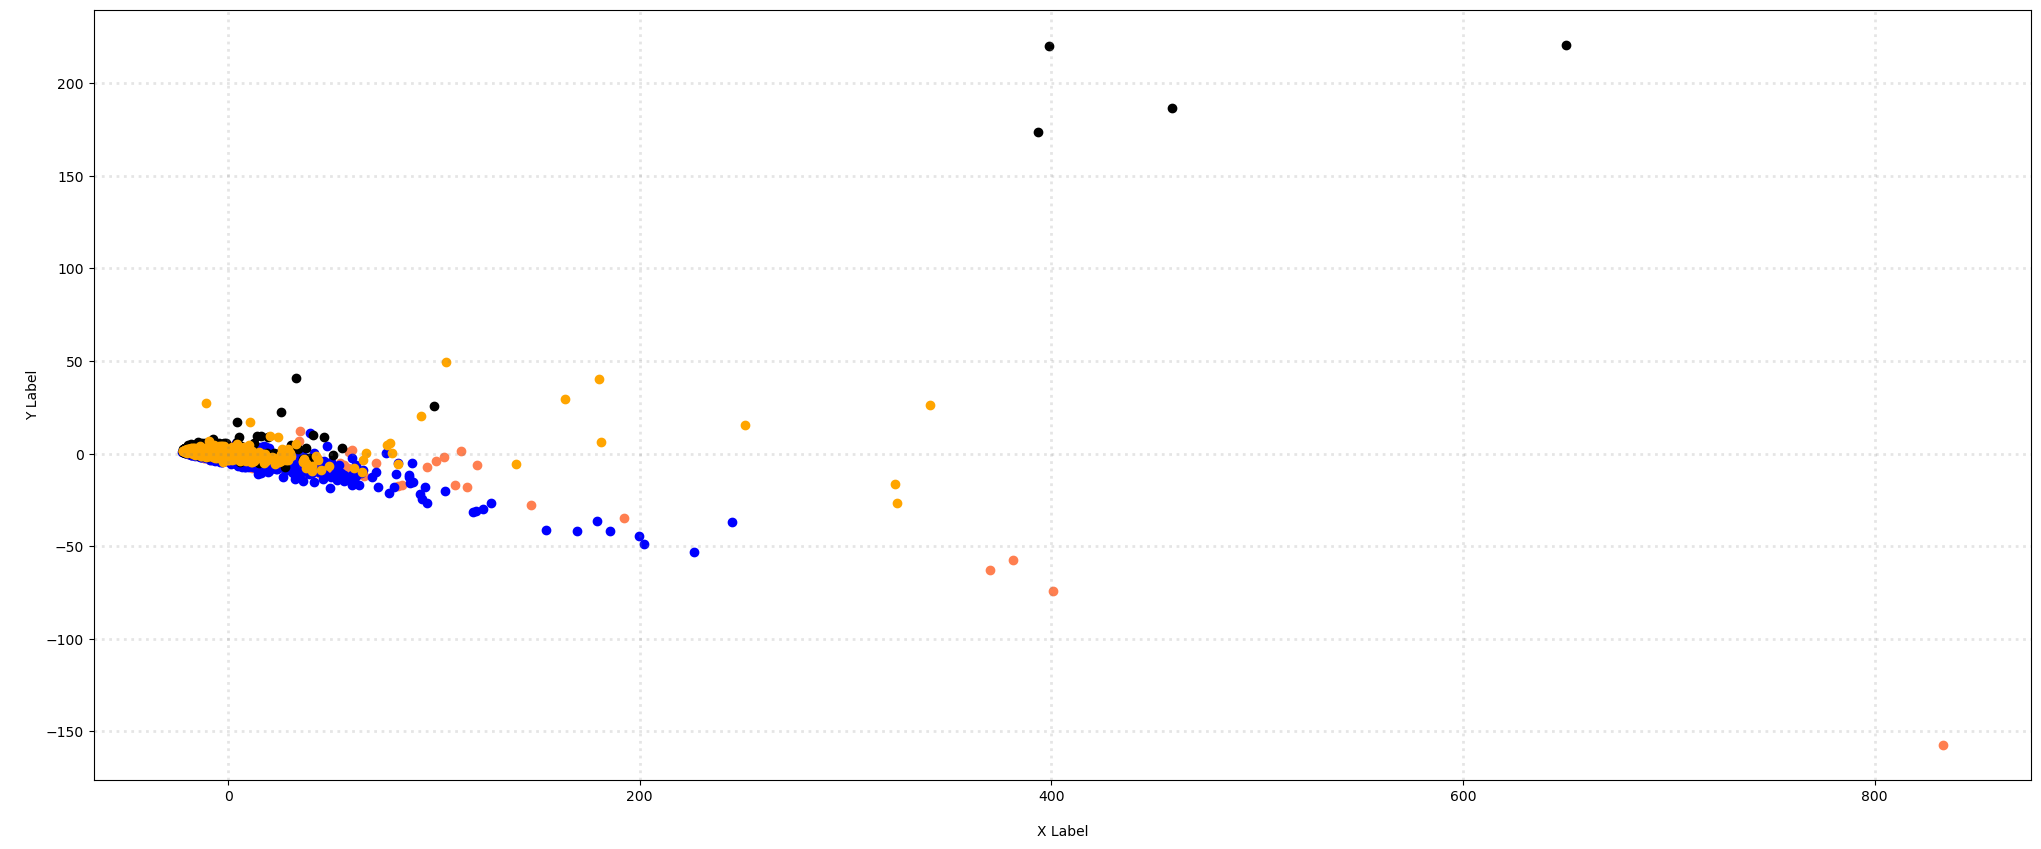

In [90]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


## Exercise 12

In [91]:
# Make the plot into 3-D to look if it is differ from 2-D plot
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced_3d.shape


(2257, 3)

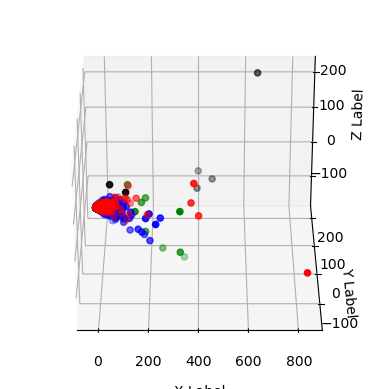

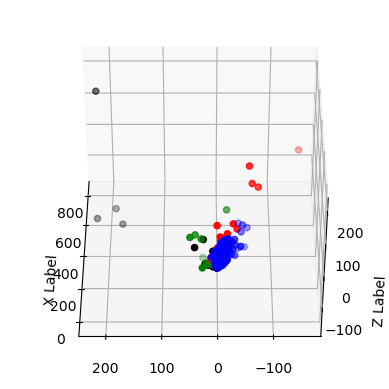

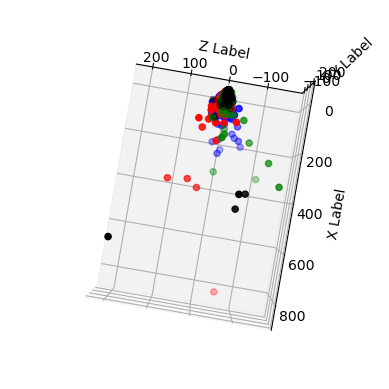

In [92]:
col = ['red', 'blue', 'black', 'green']

# plot
fig = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax = fig.add_subplot(projection='3d')
ax2 = fig2.add_subplot(projection='3d')
ax3 = fig3.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')
    ax2.scatter(xs, ys, zs, c=c, marker='o')
    ax3.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax.view_init(30, 270, 0)
ax2.view_init(40, 180, 0)
ax3.view_init(0, 90, 80)

plt.show()


#### Answer
We can see that in the three plot, the first one we can see there is a big part where red one scatters together, and the second plot we see blue one, the third plot we see black one, so we can see that with 3-D scatterplot, there is a little bit of sign which the same category stays together. Although the dimemtion reduction from 35000 to 3 is still too much, but we still get to see the sign of different categories seperate from each other.

# 5.5.1 Attribute Transformation / Aggregation

In [93]:
# To get the sum of appearance of all the words
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)


[134  92   1 ...   1   1   1]


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

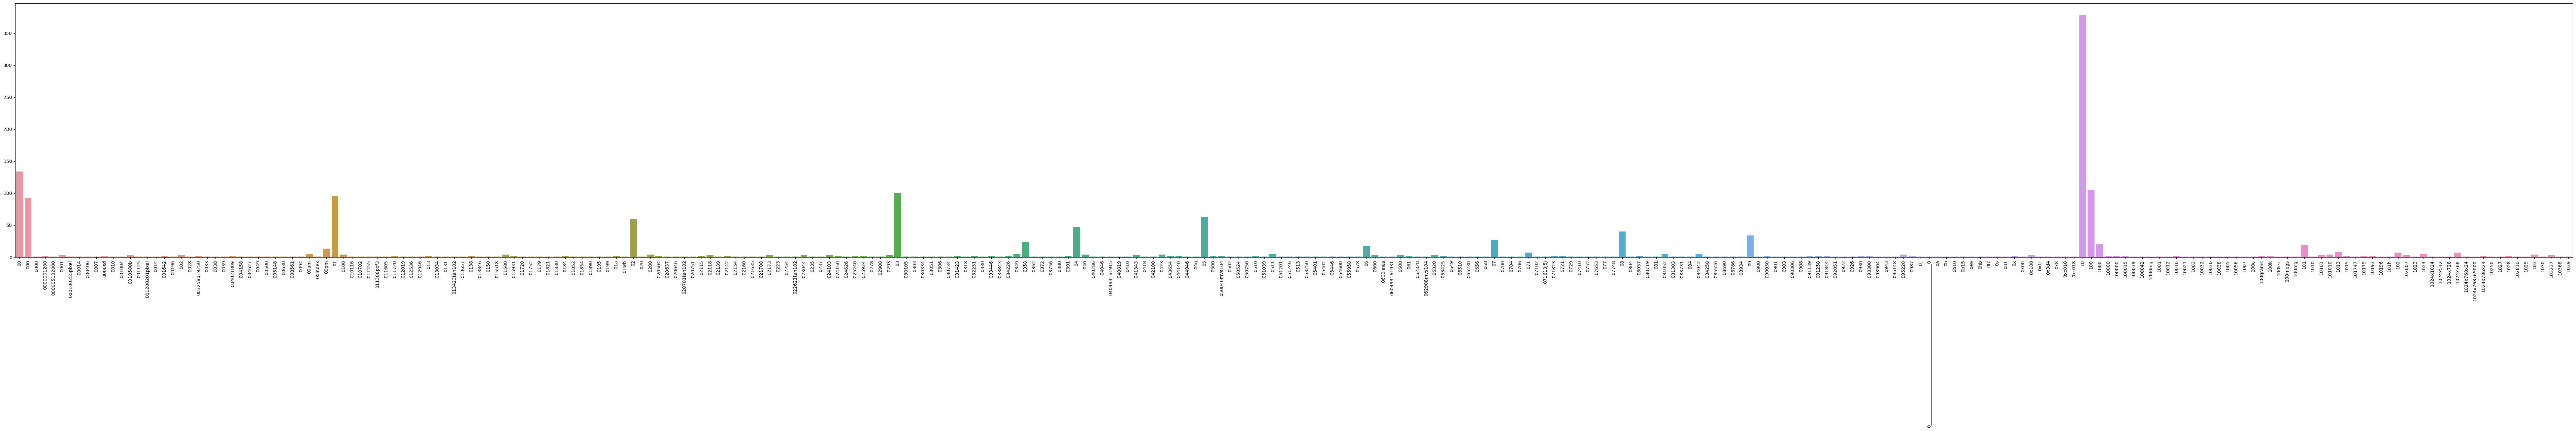

In [94]:
# Plot out the sum of word token of the first 300 word tokens
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


## Exercise 13

In [95]:
import plotly


## Exercise 14

## Exercise 15

# 5.5.2 Attribute Transformation / Aggregation

In [96]:
# Change the term_frequencies into log data to make the bar graph more readable
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

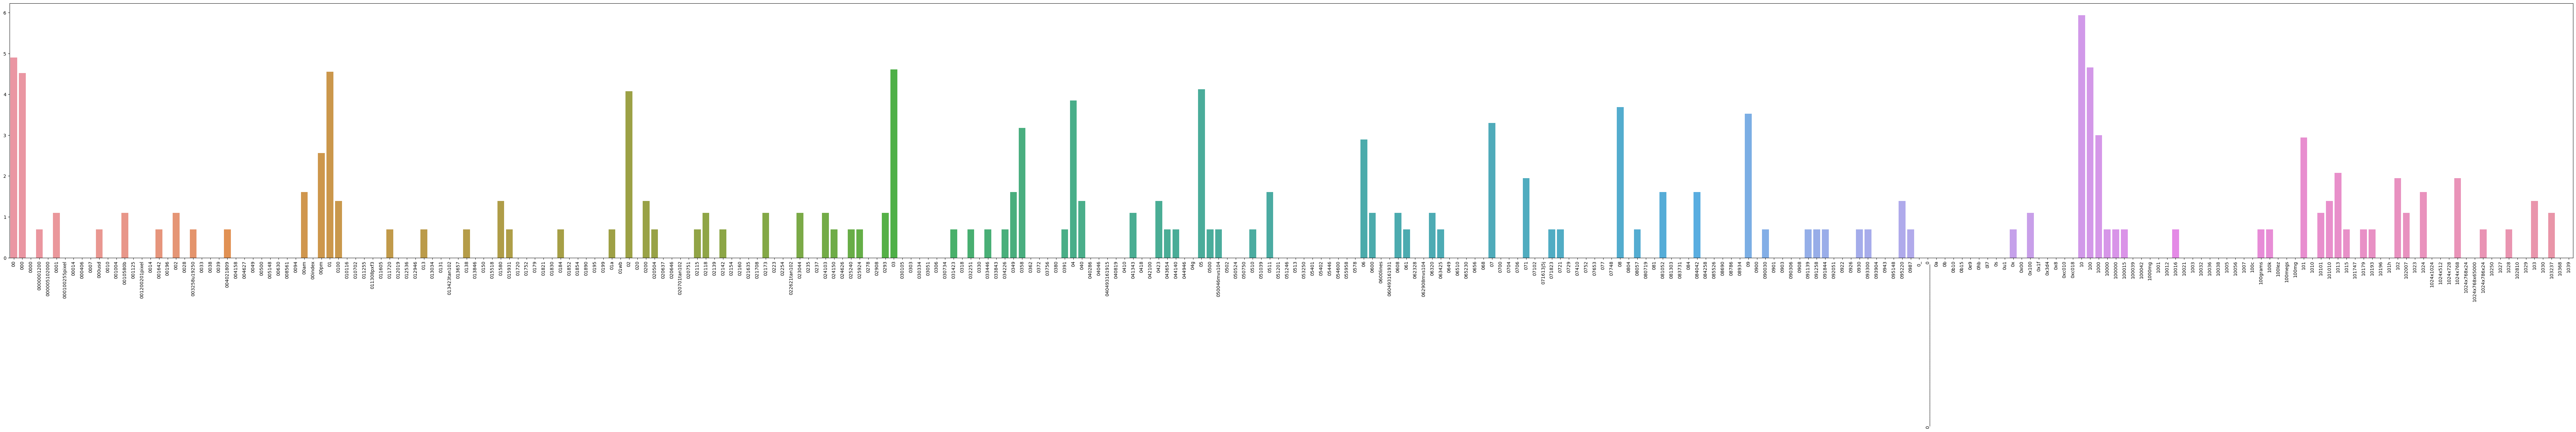

In [97]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


# 5.6 Discretization and Binarization

In [98]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


In [99]:
# Make the category into one-hot encoding
mlb = preprocessing.LabelBinarizer()


In [100]:
mlb.fit(X.category)


LabelBinarizer()

In [101]:
X['bin_category'] = mlb.transform(X['category']).tolist()


In [102]:
X


,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 1, 0]"


## Exercise 16

In [103]:
# Generate the binarization using the category_name
mlb.fit(X.category_name)


LabelBinarizer()

In [104]:
X['bin_category2'] = mlb.transform(X['category_name']).tolist()


In [105]:
X


,text,category,category_name,unigrams,bin_category,bin_category2
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
...,...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 1, 0]","[0, 0, 1, 0]"


#### Answer
It still works with category name, I think it just make the first category to 0 and so on, so the result is same as the one using category.

# 6.1 Data Exploration

In [106]:
# Retrieve random 3 sentences from X
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)


In [107]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [108]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(
    document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(
    document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(
    document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(
    document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(
    document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(
    document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %
      {"x": cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %
      {"x": cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %
      {"x": cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %
      {"x": cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %
      {"x": cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %
      {"x": cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# New Dataset Analyzation

In [250]:
# Read in the data of three txt files
path_imdb = "sentiment labelled sentences/imdb_labelled.txt"
path_amazon = "sentiment labelled sentences/amazon_cells_labelled.txt"
path_yelp = "sentiment labelled sentences/yelp_labelled.txt"

imdb_data = pd.read_csv(path_imdb, sep='.\t', header=None)
amazon_data = pd.read_csv(path_amazon, sep='.\t', header=None)
yelp_data = pd.read_csv(path_yelp, sep='.\t', header=None)


C:\Users\User\AppData\Local\Temp\ipykernel_6356\3565615875.py:6: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

C:\Users\User\AppData\Local\Temp\ipykernel_6356\3565615875.py:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

C:\Users\User\AppData\Local\Temp\ipykernel_6356\3565615875.py:8: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [251]:
sources = ['imdb', 'amazon', 'yelp']


In [252]:
# Add data source to it to differ where it came from
imdb_data.columns = ['sentence', 'score']
imdb_data['source'] = 0
imdb_data['source_name'] = 'imdb'

amazon_data.columns = ['sentence', 'score']
amazon_data['source'] = 1
amazon_data['source_name'] = 'amazon'

yelp_data.columns = ['sentence', 'score']
yelp_data['source'] = 2
yelp_data['source_name'] = 'yelp'


In [253]:
# Combine it together
frames = [imdb_data, amazon_data, yelp_data]
Data = pd.concat(frames, axis=0, ignore_index=True)


In [254]:
# Check the data
Data


,sentence,score,source,source_name
0,"A very, very, very slow-moving, aimless movie ...",0,0,imdb
1,Not sure who was more lost - the flat characte...,0,0,imdb
2,Attempting artiness with black & white and cle...,0,0,imdb
3,Very little music or anything to speak of.,0,0,imdb
4,The best scene in the movie was when Gerardo i...,1,0,imdb
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,2,yelp
2996,Appetite instantly gone,0,2,yelp
2997,Overall I was not impressed and would not go back,0,2,yelp
2998,"The whole experience was underwhelming, and I ...",0,2,yelp


In [255]:
# Check for missing values and duplicated data
Data.isnull().apply(lambda x: dmh.check_missing_values(x))


,sentence,score,source,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [256]:
# Means there are 18 duplicated result we need to deal with
sum(Data.duplicated())


18

In [257]:
# Means three data source does not have the same sentence
sum(Data.duplicated('sentence'))


18

In [258]:
# We keep the first one and delete the other duplicated ones
Data.drop_duplicates(keep="first", inplace=True)


In [259]:
# Check the data again to make sure there is no any duplicated one
sum(Data.duplicated())


0

In [260]:
# Plot the distribution of the data
import plotly.express as px
fig = px.histogram(Data, x="score", y="score", color='source',
                   barmode='group', histfunc='count', width=600, title='Data Distribution')
fig.show()


In [261]:
# Get all of the vocabularies in the data
count_vocabulary = CountVectorizer()
Data_counts = count_vocabulary.fit_transform(Data.sentence)
analyze = count_vocabulary.build_analyzer()
print(Data_counts)


  (0, 4906)	3
  (0, 4146)	1
  (0, 2965)	1
  (0, 167)	1
  (0, 2963)	1
  (0, 75)	1
  (0, 1336)	1
  (0, 1407)	1
  (0, 5156)	1
  (0, 2773)	1
  (1, 3072)	1
  (1, 4433)	1
  (1, 5049)	1
  (1, 4985)	1
  (1, 2940)	1
  (1, 2709)	1
  (1, 4544)	2
  (1, 1785)	1
  (1, 768)	1
  (1, 3153)	1
  (1, 334)	1
  (1, 3014)	1
  (1, 2080)	1
  (1, 3106)	1
  (1, 5054)	1
  :	:
  (2981, 4544)	3
  (2981, 3106)	1
  (2981, 3176)	1
  (2981, 299)	1
  (2981, 4624)	1
  (2981, 2323)	1
  (2981, 2291)	1
  (2981, 2441)	1
  (2981, 4991)	1
  (2981, 1546)	1
  (2981, 4558)	1
  (2981, 4608)	1
  (2981, 4561)	1
  (2981, 2639)	1
  (2981, 2991)	1
  (2981, 651)	1
  (2981, 592)	1
  (2981, 4555)	1
  (2981, 4645)	1
  (2981, 2076)	1
  (2981, 789)	1
  (2981, 3869)	1
  (2981, 3447)	1
  (2981, 5127)	1
  (2981, 1393)	1


In [262]:
Data_counts.shape


(2982, 5172)

In [263]:
# We want only meaningful word tokens to be inside, so use analyze but not tokenize_text
Data['unigrams'] = Data['sentence'].apply(lambda x: analyze(x))


In [264]:
Data


,sentence,score,source,source_name,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,0,imdb,"[very, very, very, slow, moving, aimless, movi..."
1,Not sure who was more lost - the flat characte...,0,0,imdb,"[not, sure, who, was, more, lost, the, flat, c..."
2,Attempting artiness with black & white and cle...,0,0,imdb,"[attempting, artiness, with, black, white, and..."
3,Very little music or anything to speak of.,0,0,imdb,"[very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,0,imdb,"[the, best, scene, in, the, movie, was, when, ..."
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,2,yelp,"[think, food, should, have, flavor, and, textu..."
2996,Appetite instantly gone,0,2,yelp,"[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go back,0,2,yelp,"[overall, was, not, impressed, and, would, not..."
2998,"The whole experience was underwhelming, and I ...",0,2,yelp,"[the, whole, experience, was, underwhelming, a..."


In [265]:
count_vocabulary.get_feature_names_out()


array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)